# Impletment

In [ ]:
pip install -U libsvm-official

In [83]:
import numpy as np
import csv
import matplotlib.pyplot as plt 
from scipy.optimize import minimize
import scipy.spatial.distance as dis
import os
from libsvm.svmutil import *
from numpy.linalg import cholesky, inv

#Part I

Part 1

In [3]:
X=np.zeros((34,1))
Y=np.zeros((34,1))
m=0
input_file=open('input.data','rb')
line=input_file.readline()
while line:
    s=line.decode("utf-8")
    x,y=s.split(' ')
    X[m][0]=float(x)
    Y[m][0]=float(y)
    line=input_file.readline()
    m+=1

In [4]:
def kernel(X1,X2,l,alpha):
    '''
    Impletation of rational quadratic kernel
    X1: (n)-array
    X2: (m)-array
    return a (n,m)-array
    ''' 
    sqeddist=np.power(X1.reshape(-1,1)-X2.reshape(1,-1),2)
    return np.power((1+sqeddist/(2*alpha*l**2)),-alpha)

In [12]:
def predict_GP(X_old,X_new,y,C,beta,l,alpha):
    '''
    Use train data (old) and test data (new) to compute new mean and variance.
    X_old: (n)-array, train data
    X_new: (m)-array, test data
    y: (n)-array, ground truth
    K: (n,n)-array, covariance matrix C
    beta, l, alpha: parameters
    return (len(X_new),1)-array, (len(X_new),1)-array
    '''
    ker_on=kernel(X_old,X_new,l,alpha)
    ker_nn=kernel(X_new,X_new,l,alpha)
    mean=ker_on.transpose()@inv(C)@y.reshape(-1,1)
    ker_star=ker_nn+1/beta*np.identity(len(ker_nn))
    var=ker_star-ker_on.transpose()@inv(C)@ker_on
    return mean,var

In [6]:
def print_graph():
    plt.plot(xlin,mean,'black')
    plt.xlim(-60,60)
    plt.fill_between(xlin,mean+2*vars,mean-2*vars,color='aquamarine')
    plt.scatter(X,Y)
    plt.show()

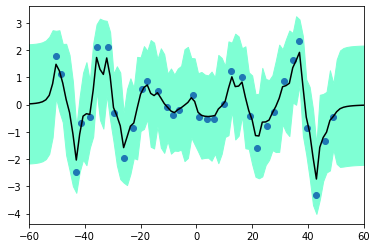

In [14]:
beta=5
C=kernel(X,X,1,1)+1/beta*np.identity(len(X))
xlin=np.linspace(-60,60,100).transpose()
mean,vars=predict_GP(X,xlin,Y,C,beta,1,1)
mean=mean.reshape(-1)
vars=np.sqrt(np.diag(vars))
print_graph()

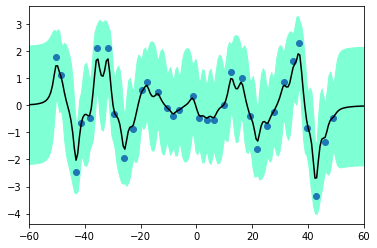

In [13]:
beta=5
C=kernel(X,X,1,1)+1/beta*np.identity(len(X))
xlin=np.linspace(-60,60,200).transpose()
mean,vars=predict_GP(X,xlin,Y,C,beta,1,1)
mean=mean.reshape(-1)
vars=np.sqrt(np.diag(vars))
print_graph()

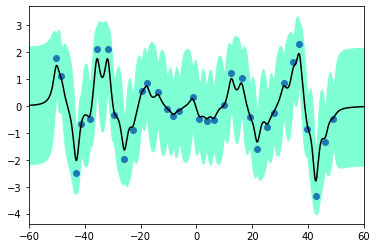

In [15]:
beta=5
C=kernel(X,X,1,1)+1/beta*np.identity(len(X))
xlin=np.linspace(-60,60,500).transpose()
mean,vars=predict_GP(X,xlin,Y,C,beta,1,1)
mean=mean.reshape(-1)
vars=np.sqrt(np.diag(vars))
print_graph()

Part 2

In [30]:
def nll_fn(X_train,Y_train,beta):
    '''
    X_train: (n)-array
    Y_train: (n)-array
    beta: parameter
    return the value of negative log-likelihood in GP
    '''
    Y_train = Y_train.ravel()
    def obj(theta):  
        C=kernel(X_train,X_train,theta[0],theta[1])\
        +1/beta*np.identity(len(X_train))
        L=cholesky(C)
        value=0.5*np.sum(np.log(np.diagonal(L)))\
        +0.5*Y_train.transpose()@inv(C)@Y_train\
        +0.5*len(X_train)*np.log(2*np.pi)
        return value
    return obj

In [39]:
value=1e9
for i in range(-2,3):
    for j in range(-2,3):
        res=minimize(nll_fn(X,Y,beta),[10**i, 10**j],\
                bounds=((1e-5, 1e5),(1e-5, 1e5)))
        if res.fun<value:
            value=res.fun
            l_opt,alpha_opt=res.x

In [42]:
print(l_opt,alpha_opt)

2.4468811091753806 901.503494930027


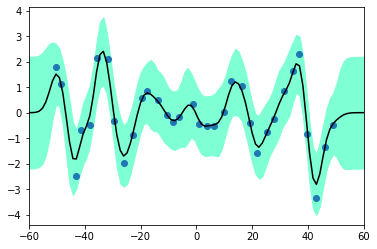

In [43]:
beta=5
C=kernel(X,X,l_opt,alpha_opt)+1/beta*np.identity(len(X))
xlin=np.linspace(-60,60,100).transpose()
mean,vars=predict_GP(X,xlin,Y,C,beta,l_opt,alpha_opt)
mean=mean.reshape(-1)
vars=np.sqrt(np.diag(vars))
print_graph()

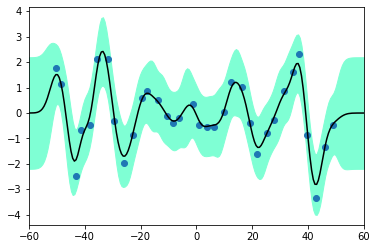

In [44]:
beta=5
C=kernel(X,X,l_opt,alpha_opt)+1/beta*np.identity(len(X))
xlin=np.linspace(-60,60,200).transpose()
mean,vars=predict_GP(X,xlin,Y,C,beta,l_opt,alpha_opt)
mean=mean.reshape(-1)
vars=np.sqrt(np.diag(vars))
print_graph()

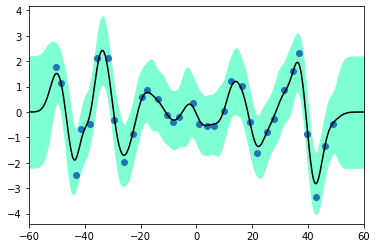

In [45]:
beta=5
C=kernel(X,X,l_opt,alpha_opt)+1/beta*np.identity(len(X))
xlin=np.linspace(-60,60,500).transpose()
mean,vars=predict_GP(X,xlin,Y,C,beta,l_opt,alpha_opt)
mean=mean.reshape(-1)
vars=np.sqrt(np.diag(vars))
print_graph()

#Part II

Part 1

In [47]:
def handle_with_csv(x,y,str):
    data=np.zeros((x,y))
    with open(str,newline='') as csvfile:
        rows = csv.reader(csvfile)
        m=0
        for row in rows:
            for i in range(y):
                data[m][i]=float(row[i])
            m+=1
    return data

In [48]:
train_x=handle_with_csv(5000,784,'X_train.csv')
train_y=handle_with_csv(5000,1,'Y_train.csv')
test_x=handle_with_csv(2500,784,'X_test.csv')
test_y=handle_with_csv(2500,1,'Y_test.csv')

In [49]:
K_type={'linear':'-t 0','polynomial':'-t 1','RBF':'-t 2'}
for parameters in K_type:
    model=svm_train(train_y.reshape(-1),train_x,K_type[parameters])
    p_label,p_acc,p_val=svm_predict(test_y.reshape(-1),test_x,model)
    print('%.2f'%(p_acc[0]),end=' ')

95.08 34.68 95.32 

Part 2

In [ ]:
for parameters in K_type:
    print(parameters)
    if parameters=='linear':
        for c in range(-9,1):
            model=svm_train(train_y.reshape(-1),train_x,\
                    '-c '+str(2**c)+' '+K_type[parameters])
            p_label,p_acc,p_val=svm_predict(test_y.reshape(-1),test_x,model)
            print('%.2f'%(p_acc[0]),end=' ')
    elif parameters=='polynomial':
        for c in range(-5,5):
            for gamma in range(-9,-3):
                model=svm_train(train_y.reshape(-1),train_x,\
                '-c '+str(2**c)+' -g '+str(2**gamma)+' '+K_type[parameters])
                p_label,p_acc,p_val=svm_predict(test_y.reshape(-1),test_x,model)
                print('%.2f'%(p_acc[0]),end=' ')
            print()
    elif parameters=='RBF':
        for c in range(-3,6):
            for gamma in range(-11,-3):
                model=svm_train(train_y.reshape(-1),train_x,\
                '-c '+str(2**c)+' -g '+str(2**gamma)+' '+K_type[parameters])
                p_label,p_acc,p_val=svm_predict(test_y.reshape(-1),test_x,model)
                print('%.2f'%(p_acc[0]),end=' ')
            print()
    print()

Part 3

In [85]:
def computed_ker(X,gamma):
    '''
    X: (n,m)-array
    gamma: parameter
    return (n,n)-array defined by linear+RBF
    '''
    linear=X@X.transpose()
    RBF=dis.squareform(np.exp(-gamma*dis.pdist(X,'sqeuclidean')))
    ker=linear+RBF
    ker=np.hstack((np.arange(1,len(X)+1).reshape(-1,1),ker))
    return ker

In [78]:
train_ker=computed_ker(train_x,2**-4)
add=svm_problem(train_y.reshape(-1),train_ker,isKernel=True)
p=svm_parameter('-t 4')
model=svm_train(add,p)
test_ker=computed_ker(test_x,2**-4)
p_label,p_acc,p_val=svm_predict(test_y.reshape(-1),test_ker,model)

Accuracy = 28.12% (703/2500) (classification)
